In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [7]:
def training_modelacc(filename):
    # load data
    df = pd.read_csv(filename, delimiter=',')
    # input and output
    X = df.drop(columns=["SHOT","GOAL","7MSHOT","6MSHOT","9MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
    y = df.GOAL
    # dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # dataset normalization
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # create the model
    model = Sequential()
    model.add(Flatten(input_shape=(6,)))  # Adjust the input shape to (12,)
    model.add(RBFLayer(6, 0.5))
    model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
    model.compile(optimizer='rmsprop', loss=mean_squared_error)  # Use mean_squared_error for regression
    # train model
    model.fit(X_train, y_train, batch_size=8, epochs=100)
    # data prediction
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14);
    plt.show()
    return model
def training_modelshot(filename):
    # load data
    df = pd.read_csv(filename, delimiter=',')
    # input and output
    X = df.drop(columns=["SHOT","GOAL","7MACC","6MACC","9MACC","WINGACC","PIVOTACC","FASTBREAKACC"])
    y = df.GOAL
    # dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # dataset normalization
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # create the model
    model = Sequential()
    model.add(Flatten(input_shape=(6,)))  # Adjust the input shape to (12,)
    model.add(RBFLayer(6, 0.5))
    model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
    model.compile(optimizer='rmsprop', loss=mean_squared_error)  # Use mean_squared_error for regression
    # train model
    model.fit(X_train, y_train, batch_size=8, epochs=100)
    # data prediction
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14);
    plt.show()
    return model

Position:  CB.csv
Epoch 1/100
211/211 [==============================] - 1s 1ms/step - loss: 11.6991
Epoch 2/100
211/211 [==============================] - 0s 1ms/step - loss: 6.4098
Epoch 3/100
211/211 [==============================] - 0s 993us/step - loss: 4.2928
Epoch 4/100
211/211 [==============================] - 0s 1ms/step - loss: 3.4411
Epoch 5/100
211/211 [==============================] - 0s 1ms/step - loss: 3.0301
Epoch 6/100
211/211 [==============================] - 0s 1ms/step - loss: 2.8397
Epoch 7/100
211/211 [==============================] - 0s 1ms/step - loss: 2.7304
Epoch 8/100
211/211 [==============================] - 0s 1ms/step - loss: 2.6402
Epoch 9/100
211/211 [==============================] - 0s 1ms/step - loss: 2.5624
Epoch 10/100
211/211 [==============================] - 0s 1ms/step - loss: 2.4894
Epoch 11/100
211/211 [==============================] - 0s 950us/step - loss: 2.4137
Epoch 12/100
211/211 [==============================] - 0s 1ms/step - los

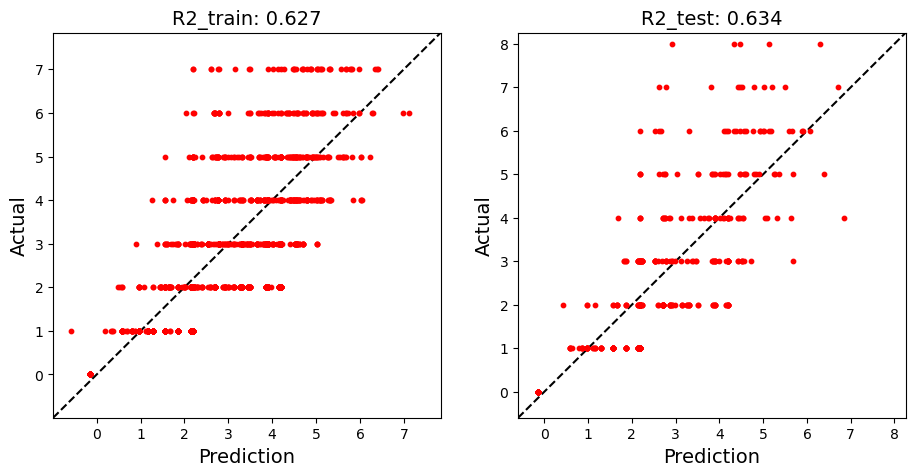


Position:  LB.csv
Epoch 1/100
228/228 [==============================] - 1s 1ms/step - loss: 5.9681
Epoch 2/100
228/228 [==============================] - 0s 1ms/step - loss: 5.0916
Epoch 3/100
228/228 [==============================] - 0s 1ms/step - loss: 4.4958
Epoch 4/100
228/228 [==============================] - 0s 991us/step - loss: 4.0381
Epoch 5/100
228/228 [==============================] - 0s 972us/step - loss: 3.7513
Epoch 6/100
228/228 [==============================] - 0s 992us/step - loss: 3.5627
Epoch 7/100
228/228 [==============================] - 0s 979us/step - loss: 3.4194
Epoch 8/100
228/228 [==============================] - 0s 989us/step - loss: 3.2794
Epoch 9/100
228/228 [==============================] - 0s 985us/step - loss: 3.1370
Epoch 10/100
228/228 [==============================] - 0s 996us/step - loss: 3.0046
Epoch 11/100
228/228 [==============================] - 0s 1ms/step - loss: 2.8764
Epoch 12/100
228/228 [==============================] - 0s 991u

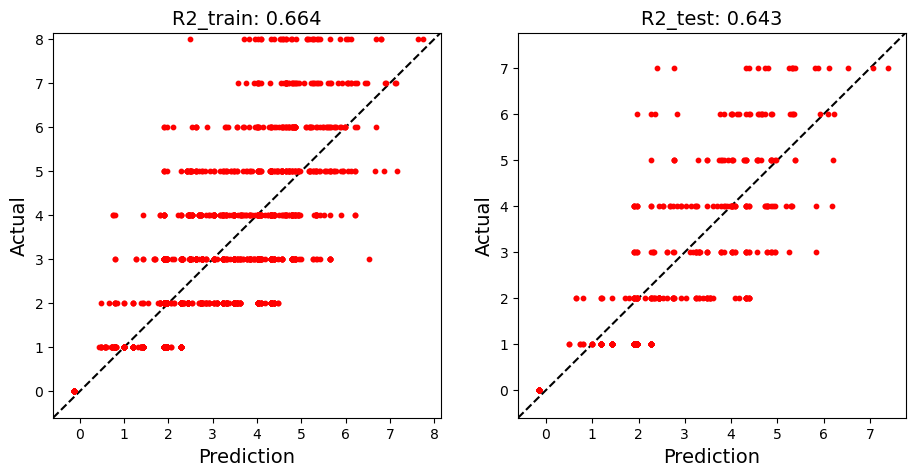


Position:  LW.csv
Epoch 1/100
166/166 [==============================] - 0s 1ms/step - loss: 10.6239
Epoch 2/100
166/166 [==============================] - 0s 1ms/step - loss: 7.4893
Epoch 3/100
166/166 [==============================] - 0s 1ms/step - loss: 6.0991
Epoch 4/100
166/166 [==============================] - 0s 1ms/step - loss: 5.6288
Epoch 5/100
166/166 [==============================] - 0s 1ms/step - loss: 5.4224
Epoch 6/100
166/166 [==============================] - 0s 1ms/step - loss: 5.2441
Epoch 7/100
166/166 [==============================] - 0s 1ms/step - loss: 5.0764
Epoch 8/100
166/166 [==============================] - 0s 925us/step - loss: 4.9146
Epoch 9/100
166/166 [==============================] - 0s 955us/step - loss: 4.7672
Epoch 10/100
166/166 [==============================] - 0s 991us/step - loss: 4.6102
Epoch 11/100
166/166 [==============================] - 0s 1ms/step - loss: 4.4505
Epoch 12/100
166/166 [==============================] - 0s 1ms/step - 

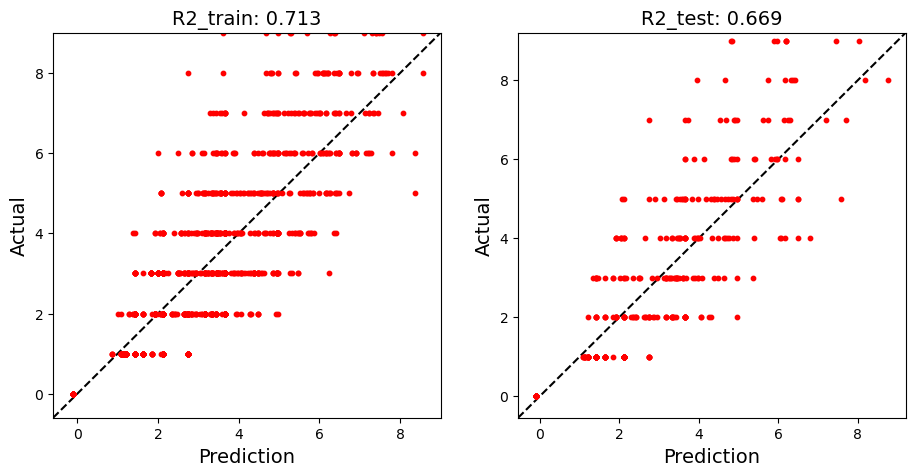


Position:  P.csv
Epoch 1/100
207/207 [==============================] - 1s 1ms/step - loss: 3.4193
Epoch 2/100
207/207 [==============================] - 0s 1ms/step - loss: 2.7489
Epoch 3/100
207/207 [==============================] - 0s 1ms/step - loss: 2.5874
Epoch 4/100
207/207 [==============================] - 0s 1ms/step - loss: 2.4411
Epoch 5/100
207/207 [==============================] - 0s 1ms/step - loss: 2.2898
Epoch 6/100
207/207 [==============================] - 0s 947us/step - loss: 2.1566
Epoch 7/100
207/207 [==============================] - 0s 2ms/step - loss: 2.0497
Epoch 8/100
207/207 [==============================] - 0s 1ms/step - loss: 1.9552
Epoch 9/100
207/207 [==============================] - 0s 1ms/step - loss: 1.8690
Epoch 10/100
207/207 [==============================] - 0s 1ms/step - loss: 1.7976
Epoch 11/100
207/207 [==============================] - 0s 1ms/step - loss: 1.7350
Epoch 12/100
207/207 [==============================] - 0s 1ms/step - loss: 

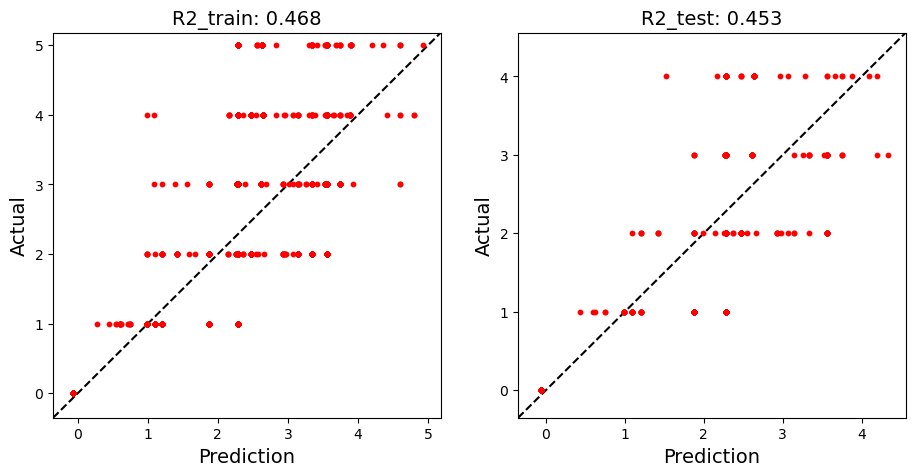


Position:  RB.csv
Epoch 1/100
186/186 [==============================] - 1s 1ms/step - loss: 8.0681
Epoch 2/100
186/186 [==============================] - 0s 1ms/step - loss: 6.6714
Epoch 3/100
186/186 [==============================] - 0s 1ms/step - loss: 5.9424
Epoch 4/100
186/186 [==============================] - 0s 1ms/step - loss: 5.4072
Epoch 5/100
186/186 [==============================] - 0s 994us/step - loss: 4.9692
Epoch 6/100
186/186 [==============================] - 0s 1ms/step - loss: 4.6763
Epoch 7/100
186/186 [==============================] - 0s 1ms/step - loss: 4.4825
Epoch 8/100
186/186 [==============================] - 0s 1ms/step - loss: 4.3000
Epoch 9/100
186/186 [==============================] - 0s 1ms/step - loss: 4.1219
Epoch 10/100
186/186 [==============================] - 0s 1ms/step - loss: 3.9469
Epoch 11/100
186/186 [==============================] - 0s 1ms/step - loss: 3.7870
Epoch 12/100
186/186 [==============================] - 0s 1ms/step - loss:

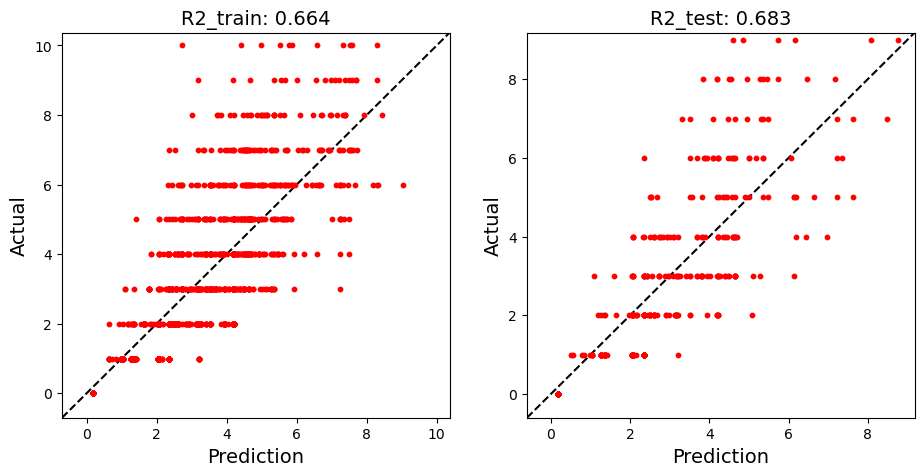


Position:  RW.csv
Epoch 1/100
170/170 [==============================] - 1s 1ms/step - loss: 16.9463
Epoch 2/100
170/170 [==============================] - 0s 1ms/step - loss: 11.6688
Epoch 3/100
170/170 [==============================] - 0s 1ms/step - loss: 8.6577
Epoch 4/100
170/170 [==============================] - 0s 1ms/step - loss: 7.0325
Epoch 5/100
170/170 [==============================] - 0s 1ms/step - loss: 6.0119
Epoch 6/100
170/170 [==============================] - 0s 1ms/step - loss: 5.2025
Epoch 7/100
170/170 [==============================] - 0s 1ms/step - loss: 4.5478
Epoch 8/100
170/170 [==============================] - 0s 1ms/step - loss: 4.0129
Epoch 9/100
170/170 [==============================] - 0s 1ms/step - loss: 3.6144
Epoch 10/100
170/170 [==============================] - 0s 1ms/step - loss: 3.3176
Epoch 11/100
170/170 [==============================] - 0s 1ms/step - loss: 3.0930
Epoch 12/100
170/170 [==============================] - 0s 1ms/step - loss:

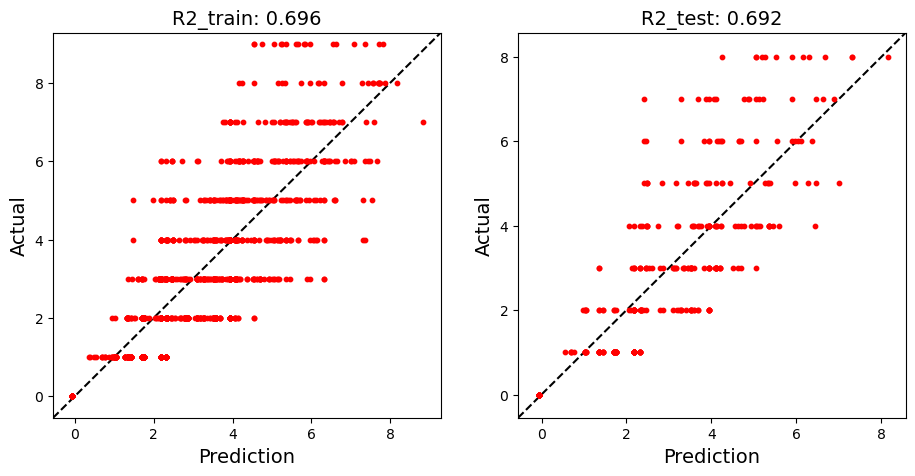

In [8]:
for i in os.listdir('databaruiqr/'):
    print('Position: ', i.split(',')[0])
    training_modelacc('databaruiqr/'+i)
    print('')

Position:  CB.csv
Epoch 1/100
211/211 [==============================] - 1s 1ms/step - loss: 5.5248
Epoch 2/100
211/211 [==============================] - 0s 1ms/step - loss: 4.3684
Epoch 3/100
211/211 [==============================] - 0s 1ms/step - loss: 3.9751
Epoch 4/100
211/211 [==============================] - 0s 1ms/step - loss: 3.7112
Epoch 5/100
211/211 [==============================] - 0s 974us/step - loss: 3.5283
Epoch 6/100
211/211 [==============================] - 0s 988us/step - loss: 3.3782
Epoch 7/100
211/211 [==============================] - 0s 950us/step - loss: 3.2545
Epoch 8/100
211/211 [==============================] - 0s 983us/step - loss: 3.1427
Epoch 9/100
211/211 [==============================] - 0s 1ms/step - loss: 3.0324
Epoch 10/100
211/211 [==============================] - 0s 1ms/step - loss: 2.9306
Epoch 11/100
211/211 [==============================] - 0s 1ms/step - loss: 2.8370
Epoch 12/100
211/211 [==============================] - 0s 1ms/step - 

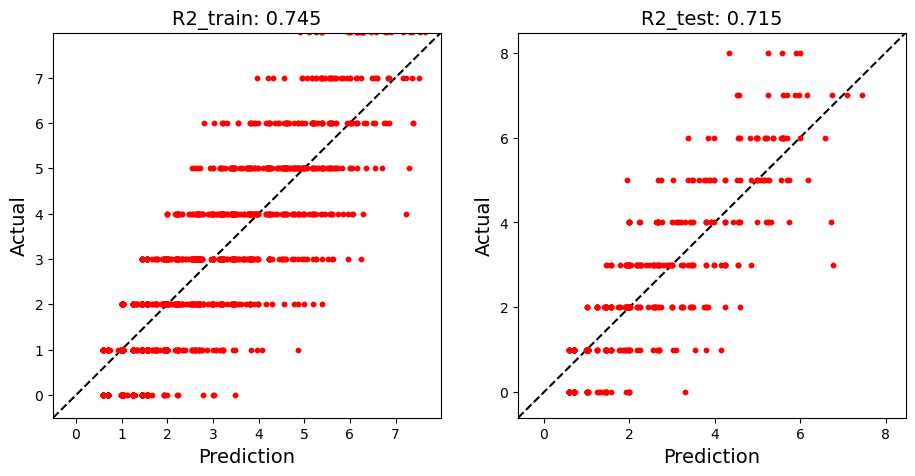


Position:  LB.csv
Epoch 1/100
228/228 [==============================] - 1s 1ms/step - loss: 7.8687
Epoch 2/100
228/228 [==============================] - 0s 1ms/step - loss: 5.0673
Epoch 3/100
228/228 [==============================] - 0s 1ms/step - loss: 4.4472
Epoch 4/100
228/228 [==============================] - 0s 962us/step - loss: 4.1823
Epoch 5/100
228/228 [==============================] - 0s 923us/step - loss: 4.0148
Epoch 6/100
228/228 [==============================] - 0s 923us/step - loss: 3.8731
Epoch 7/100
228/228 [==============================] - 0s 989us/step - loss: 3.7493
Epoch 8/100
228/228 [==============================] - 0s 1ms/step - loss: 3.6391
Epoch 9/100
228/228 [==============================] - 0s 989us/step - loss: 3.5348
Epoch 10/100
228/228 [==============================] - 0s 980us/step - loss: 3.4297
Epoch 11/100
228/228 [==============================] - 0s 914us/step - loss: 3.3276
Epoch 12/100
228/228 [==============================] - 0s 949u

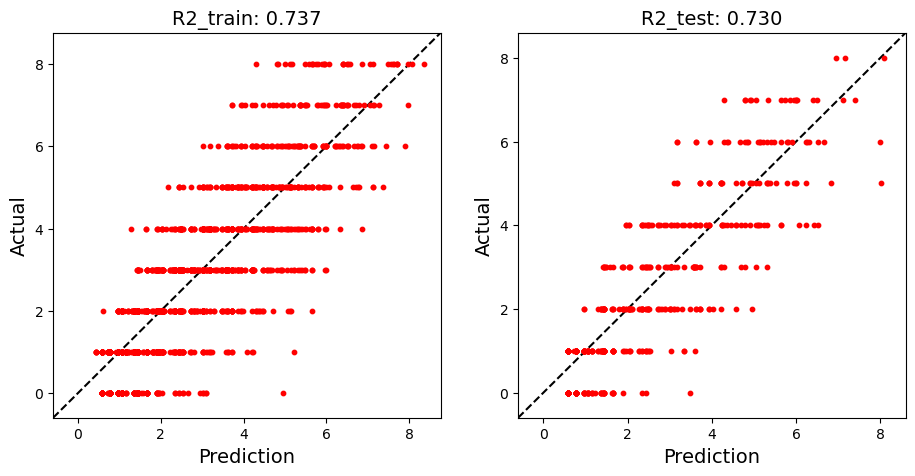


Position:  LW.csv
Epoch 1/100
166/166 [==============================] - 0s 1ms/step - loss: 9.4789
Epoch 2/100
166/166 [==============================] - 0s 993us/step - loss: 6.0396
Epoch 3/100
166/166 [==============================] - 0s 1ms/step - loss: 4.9423
Epoch 4/100
166/166 [==============================] - 0s 1ms/step - loss: 4.5592
Epoch 5/100
166/166 [==============================] - 0s 1ms/step - loss: 4.3255
Epoch 6/100
166/166 [==============================] - 0s 999us/step - loss: 4.1515
Epoch 7/100
166/166 [==============================] - 0s 1ms/step - loss: 4.0075
Epoch 8/100
166/166 [==============================] - 0s 998us/step - loss: 3.8719
Epoch 9/100
166/166 [==============================] - 0s 1ms/step - loss: 3.7506
Epoch 10/100
166/166 [==============================] - 0s 978us/step - loss: 3.6367
Epoch 11/100
166/166 [==============================] - 0s 979us/step - loss: 3.5337
Epoch 12/100
166/166 [==============================] - 0s 958us/st

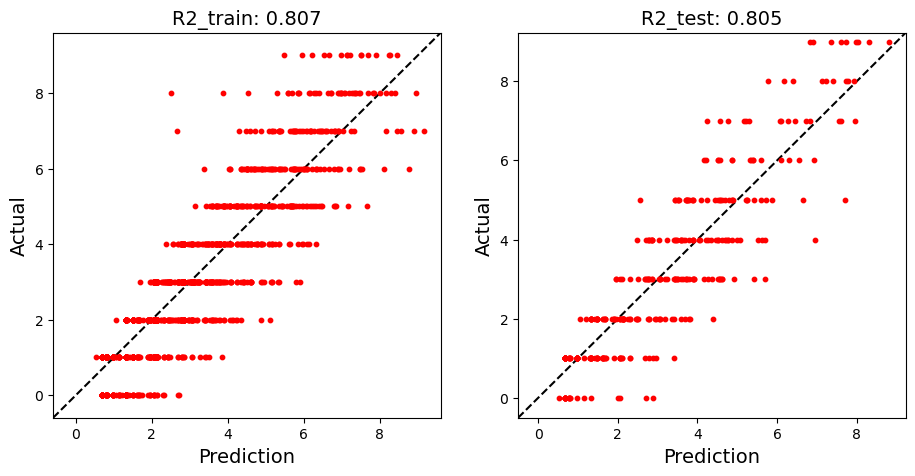


Position:  P.csv
Epoch 1/100
207/207 [==============================] - 0s 1ms/step - loss: 9.3786
Epoch 2/100
207/207 [==============================] - 0s 1ms/step - loss: 3.7565
Epoch 3/100
207/207 [==============================] - 0s 1ms/step - loss: 2.2477
Epoch 4/100
207/207 [==============================] - 0s 997us/step - loss: 1.7897
Epoch 5/100
207/207 [==============================] - 0s 983us/step - loss: 1.5641
Epoch 6/100
207/207 [==============================] - 0s 1ms/step - loss: 1.4582
Epoch 7/100
207/207 [==============================] - 0s 1ms/step - loss: 1.3907
Epoch 8/100
207/207 [==============================] - 0s 1ms/step - loss: 1.3298
Epoch 9/100
207/207 [==============================] - 0s 1ms/step - loss: 1.2775
Epoch 10/100
207/207 [==============================] - 0s 1ms/step - loss: 1.2232
Epoch 11/100
207/207 [==============================] - 0s 994us/step - loss: 1.1751
Epoch 12/100
207/207 [==============================] - 0s 1ms/step - lo

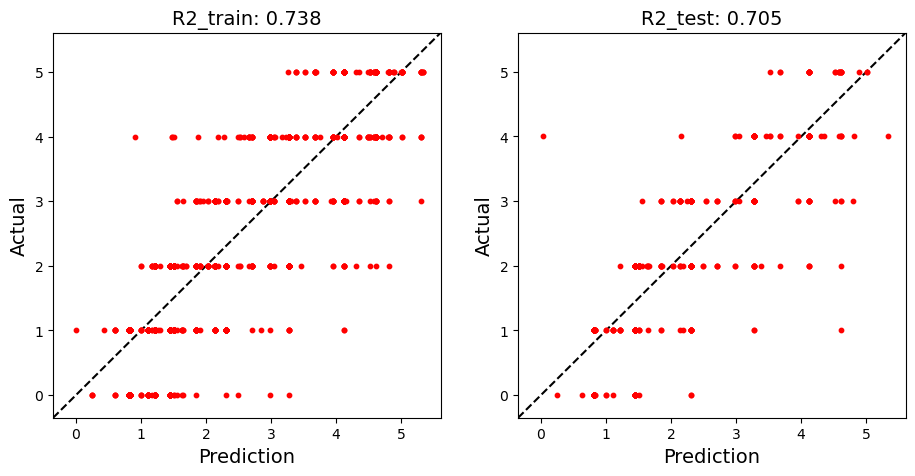


Position:  RB.csv
Epoch 1/100
186/186 [==============================] - 1s 1ms/step - loss: 12.9213
Epoch 2/100
186/186 [==============================] - 0s 1ms/step - loss: 7.9729
Epoch 3/100
186/186 [==============================] - 0s 1ms/step - loss: 6.2147
Epoch 4/100
186/186 [==============================] - 0s 1ms/step - loss: 5.7013
Epoch 5/100
186/186 [==============================] - 0s 1ms/step - loss: 5.5300
Epoch 6/100
186/186 [==============================] - 0s 1ms/step - loss: 5.3957
Epoch 7/100
186/186 [==============================] - 0s 981us/step - loss: 5.2672
Epoch 8/100
186/186 [==============================] - 0s 938us/step - loss: 5.1498
Epoch 9/100
186/186 [==============================] - 0s 965us/step - loss: 5.0443
Epoch 10/100
186/186 [==============================] - 0s 1ms/step - loss: 4.9395
Epoch 11/100
186/186 [==============================] - 0s 1ms/step - loss: 4.8365
Epoch 12/100
186/186 [==============================] - 0s 1ms/step - 

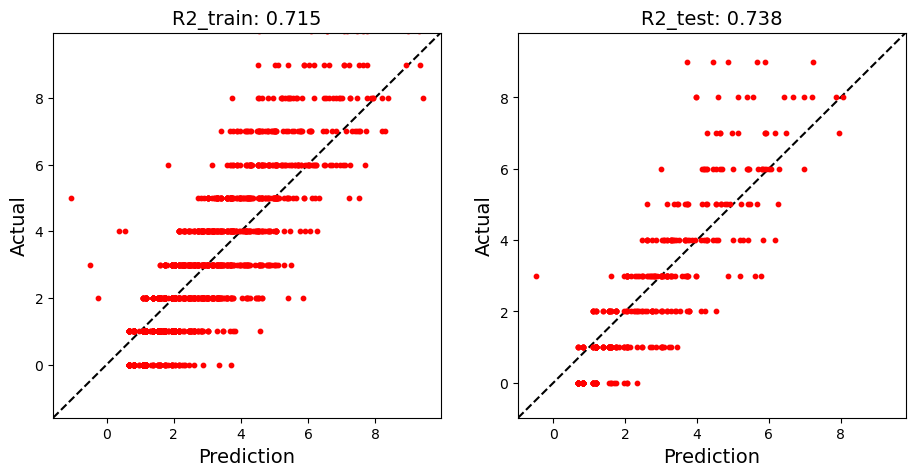


Position:  RW.csv
Epoch 1/100
170/170 [==============================] - 1s 990us/step - loss: 9.5560
Epoch 2/100
170/170 [==============================] - 0s 995us/step - loss: 6.1496
Epoch 3/100
170/170 [==============================] - 0s 1ms/step - loss: 4.9780
Epoch 4/100
170/170 [==============================] - 0s 1ms/step - loss: 4.4851
Epoch 5/100
170/170 [==============================] - 0s 1ms/step - loss: 4.1836
Epoch 6/100
170/170 [==============================] - 0s 1ms/step - loss: 3.9626
Epoch 7/100
170/170 [==============================] - 0s 1ms/step - loss: 3.7935
Epoch 8/100
170/170 [==============================] - 0s 1ms/step - loss: 3.6619
Epoch 9/100
170/170 [==============================] - 0s 1ms/step - loss: 3.5476
Epoch 10/100
170/170 [==============================] - 0s 1ms/step - loss: 3.4491
Epoch 11/100
170/170 [==============================] - 0s 1ms/step - loss: 3.3561
Epoch 12/100
170/170 [==============================] - 0s 1ms/step - los

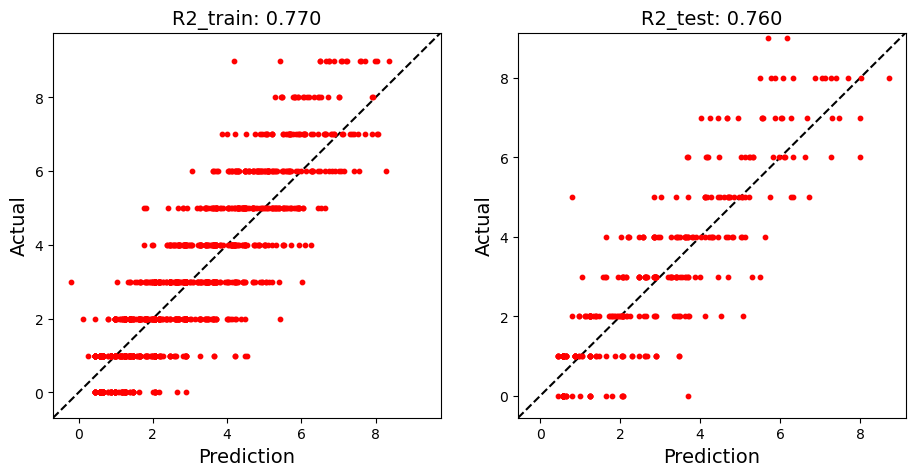

In [9]:
for i in os.listdir('databaruiqr/'):
    print('Position: ', i.split(',')[0])
    training_modelshot('databaruiqr/'+i)
    print('')